# CS210 Spring 2019 - Final Project
Terrorism-Happiness Analysis Project
Group Members:
    
   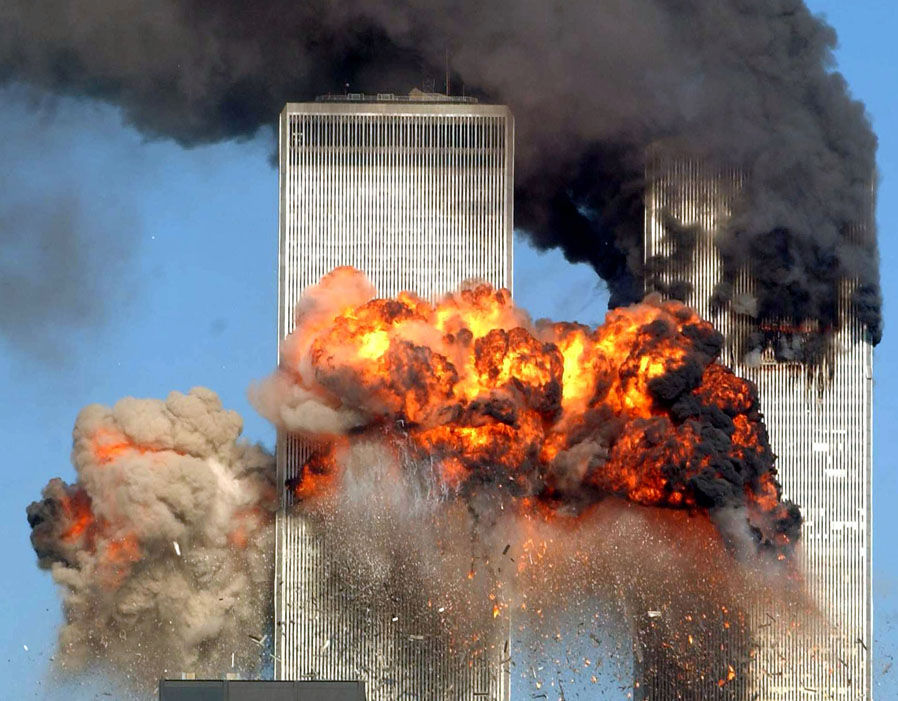    
    
   Berkay Ersever
    
   Bahadır Berber
    
   Egemen Yiğit Kömürcü
    
   Ali Yasin Akalın


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [3]:
from os.path import join
from pprint import pprint

In [4]:
d_path = "./data"
d_file17 = "happiness_2017.csv"

In [5]:
d_path = "./data"
d_file16 = "happiness_2016.csv"

In [6]:
d_path = "./data"
d_file15 = "happiness_2015.csv"

In [7]:
d_path = "./data"
d_file2 = "attacks_data.csv"

In [8]:
df17 = pd.read_csv(join(d_path, d_file17))
df16 = pd.read_csv(join(d_path, d_file16))
df15 = pd.read_csv(join(d_path, d_file15))

In [9]:
df2 = pd.read_csv(join(d_path, d_file2))

In [10]:
df17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [11]:
df16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [12]:
df15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
df2.head()

,Unnamed: 0,Date,Country,City,Killed,Injured,Description
0,1,2002-01-01,Indonesia,Palu,1,0,Four bombs explode at Christian churches and o...
1,2,2002-01-01,India,Baramulla,1,0,Terrorists enter the home of a civilian and ki...
2,3,2002-01-01,India,Poshkar,2,0,Two civilians are abducted from their homes th...
3,4,2002-01-02,India,Rajouri,6,9,Three separate terror attacks in the district ...
4,5,2002-01-02,India,Jehangir Chowk,2,25,A Muslim militant kills two and injures twenty...


# STEP 1: Project Description
In this project, our goal is to display statistical facts terrorism attacks in different countries through self-explanatory visualizations and tables regarding various aspects such as the type of the terrorist attacks and the happiness index of that country.

# Datasets
The datasets length for happiness index is 155 country by 12 attributes roughly and 29364 bomb attacks by 7 attributes for terrorism data.

# STEP 2: Data Exploration

In [14]:
# print shape
print('Data Dimensionality of Happiness17 index: ',df17.shape)

Data Dimensionality of Happiness17 index:  (155, 12)


In [15]:
print('Data Dimensionality of Happiness16 index: ',df16.shape)

Data Dimensionality of Happiness16 index:  (157, 13)


In [16]:
print('Data Dimensionality of Happiness15 index: ',df15.shape)

Data Dimensionality of Happiness15 index:  (158, 12)


In [17]:
print('Data Dimensionality of Terrorist Attacks index: ',df2.shape)

Data Dimensionality of Terrorist Attacks index:  (29364, 7)


In [18]:
# print attribute names
print('Attribute Names of Happiness Index Data: ',df17.columns)

Attribute Names of Happiness Index Data:  Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


In [19]:
# print attribute names
print('Attribute Names of Terrorist Attack Data: ',df2.columns)

Attribute Names of Terrorist Attack Data:  Index(['Unnamed: 0', 'Date', 'Country', 'City', 'Killed', 'Injured',
       'Description'],
      dtype='object')


In [20]:
df17.dtypes  # data types of each column

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [21]:
df2.dtypes  # data types of each column

Unnamed: 0      int64
Date           object
Country        object
City           object
Killed          int64
Injured         int64
Description    object
dtype: object

In [22]:
df17.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [23]:
df2.describe()

,Unnamed: 0,Killed,Injured
count,29364.000000,29364.000000,29364.000000
mean,14682.500000,6.659822,9.399537
std,8476.800989,24.164587,31.126073
min,1.000000,0.000000,0.000000
25%,7341.750000,1.000000,0.000000
50%,14682.500000,2.000000,1.000000
75%,22023.250000,6.000000,8.000000
max,29364.000000,2000.000000,1841.000000


# PART 2-2 : Preprocessing

In [24]:
df17.isnull().sum()  # NaN counts in each column

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [25]:
df2.isnull().sum() 

Unnamed: 0     0
Date           0
Country        0
City           0
Killed         0
Injured        0
Description    1
dtype: int64

Since there are no null values there is nothing to consider for nan values. But we need to clear one data in description.

In [26]:
desc=df2.isnull()['Description']
nan=0
for i in range(len(desc)):
    if desc[i]==1:
        nan=i
nan

16399

So in the 16399th row we have a NAN value for description column.

In [27]:
df2.loc[nan]

Unnamed: 0          16400
Date           2011-11-03
Country           Nigeria
City               Zonkwa
Killed                  2
Injured                12
Description           NaN
Name: 16399, dtype: object

Then we need to fill that first, then maybe we can predict the type of the attack by using machine learning techniques.

In [28]:
df2['Description'][nan]=""

Testing whether we have still nan values

In [29]:
df2.isnull().sum()

Unnamed: 0     0
Date           0
Country        0
City           0
Killed         0
Injured        0
Description    0
dtype: int64

In [30]:
#Converting string type pickup_datetime to date type
df2['Date']= pd.to_datetime(df2['Date'])
#df2['Date']= datetime.strptime(df2['Date'], '%Y-%m-%d')

In [31]:
df2.dtypes

Unnamed: 0              int64
Date           datetime64[ns]
Country                object
City                   object
Killed                  int64
Injured                 int64
Description            object
dtype: object

Now, it becomes a date object

Extracting the type of terrorist attacks into descriptors such as bomb, rocket, shooting and car.

In [32]:
print(df2['Description'][0])
"bomb" in df2['Description'][0]

Four bombs explode at Christian churches and one man dies in a hand grenade attack in Jakarta.


True

In [33]:
import re
#bomb
#patternb = re.compile('^bomb.$')
matches = [] 
for i in range(len(df2)):
    #if patternb.match(df2['Description'][i]):
    if ("bomb" or "grenade") in df2['Description'][i]:
        matches.append("Bomb")
    elif "rocket" in df2['Description'][i]:
        matches.append("Rocket")
    elif ("shoot" or "gun" or "weapon") in df2['Description'][i]:
        matches.append("Shooting")
    elif "car" in df2['Description'][i]:
        matches.append("Car")
    elif "ambush" in df2['Description'][i]:
        matches.append("Ambush")
    elif "abduct" in df2['Description'][i]:
        matches.append("Abduct")
    else:
        matches.append("Others")


In [34]:
df2['Type of Attacks']=matches
df2

,Unnamed: 0,Date,Country,City,Killed,Injured,Description,Type of Attacks
0,1,2002-01-01,Indonesia,Palu,1,0,Four bombs explode at Christian churches and o...,Bomb
1,2,2002-01-01,India,Baramulla,1,0,Terrorists enter the home of a civilian and ki...,Others
2,3,2002-01-01,India,Poshkar,2,0,Two civilians are abducted from their homes th...,Abduct
3,4,2002-01-02,India,Rajouri,6,9,Three separate terror attacks in the district ...,Others
4,5,2002-01-02,India,Jehangir Chowk,2,25,A Muslim militant kills two and injures twenty...,Others
5,6,2002-01-03,Pakistan,Karachi,1,0,A cleric is gunned down in a sectarian attack.,Others
6,7,2002-01-04,India,Kashmir,2,0,Two civilians are abducted and killed by the M...,Abduct
7,8,2002-01-05,India,Mahore,2,3,An ambush on a security patrol leaves two memb...,Ambush
8,9,2002-01-06,India,Ramsu,3,12,Three brothers are killed in their home by Las...,Others
9,10,2002-01-06,India,Luddu,4,4,"Four civilians, three of whom were in the same...",Others


In [35]:
others=[]
for i in range(len(df2)):
    if df2['Type of Attacks'][i]=="Others":
        others.append(df2["Description"][i])
others

['Terrorists enter the home of a civilian and kill his wife.',
 'Three separate terror attacks in the district leave a civilian and five security forces dead.',
 'A Muslim militant kills two and injures twenty-five in a grenade attack on a city street.',
 'A cleric is gunned down in a sectarian attack.',
 'Three brothers are killed in their home by Lashkar-e-Toiba terrorists.  A dozen others are injured in the attack.',
 'Four civilians, three of whom were in the same family are gunned down when fleeing their home after Jaish-e-Mohammed cadres flush them out with grenades.',
 'Fifteen year-old flies plane into an office building in Tampa. Suicide note reveals his admiration for Osama Bin Laden and desire to commit a terrorist attack.',
 'Soldier killed by two Mujahideen suicide attackers.',
 'Palestinian terrorists infiltrate border and kill four soldiers. Two others were wounded.',
 'Government official is killed by Islamists.',
 'Terrorists kill a village official.',
 'A civilian is 

Displaying the number of type of the attacks

In [36]:
df2.groupby(['Type of Attacks'])['Killed'].count()

Type of Attacks
Abduct        458
Ambush        826
Bomb         9027
Car           490
Others      16615
Rocket        587
Shooting     1361
Name: Killed, dtype: int64

# Data Visualisation

Displaying which type of attacks correspond to higher massacres

In [37]:
df2.groupby(['Type of Attacks']).sum()

,Unnamed: 0,Killed,Injured
Type of Attacks,,,
Abduct,4010941,1314,641
Ambush,9957281,3900,3026
Bomb,140821019,73279,174796
Car,5749986,2129,1982
Others,242871198,107628,85593
Rocket,9524299,2687,6926
Shooting,18202206,4622,3044


Demonstration of the number of killed people according to country

In [38]:
#Extracting 2016 terrorist attacks
y=df2["Date"].dt.year==2016
y16=df2[y]
y16=y16.groupby(['Country'])['Killed'].sum()
y16 = pd.DataFrame(y16)
y16


,Killed
Country,
Afghanistan,721
Bahrain,2
Bangladesh,50
Belgium,35
Burkina Faso,29
CAR,10
Cameroon,152
Canada,0
Chad,5


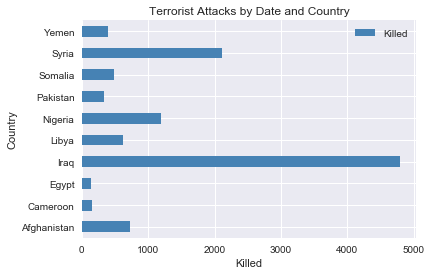

In [39]:
#Take the countries that have greater than 100 people killed.
bo=y16["Killed"]>100
y16=y16[bo]

y16.plot(kind="barh", color="steelblue") 

#sns.distplot(df17["HappinessIndex"].values, norm_hist=True)

plt.xlabel("Killed")
plt.title("Terrorist Attacks by Date and Country")
plt.show()

Hopefully Turkey is not in the list.

# PART 2-2: Hypothesis Testing

## What is hypothesis testing?

![](https://stepupanalytics.com/wp-content/uploads/2017/06/Hypothesis-Testing-Edited1.jpg)

In an analytical process, we would propose various claims regarding different aspects of the data. Visualization is an important tool to support these claims; however we need statistical tests to show that our claims are sound.

##### Structure of a hypothesis test

- **Null Hypothesis**  
- **Alternative Hypothesis**
- **Statictical Test**
    - Obtaining the test score and p-value
- **Interpreting the results**

In the example above, our null hypothesis $H_0$ is that the mean of passenger groupsize and distance are equal in both time period.  
As the alternative hypothesis $H_a$, we proposed that they are different.

Depending on the data set, we need to choose an appropriate significance test. The results obtained from the test help us to determine whether we can reject the null hypothesis or not.

P-value shows how well the sample data support that the null hypothesis is true. Based on different significance levels, $\alpha$, we can reject or fail to reject the null hypothesis. 

# How did the terrorist attacks in 2016 affect happiness index at that country in 2017 compared to 2015.

Testin Null hypothesis: the terrorist attacks in 2016 has no effect on happiness index at that country in 2017 compared to 2015.

In [40]:
happ17=df17[['Country','Happiness.Score']]
happ15=df15[['Country','Happiness Score']]

In [41]:
#Extracting 2016 terrorist attacks
y=df2["Date"].dt.year==2016
y16=df2[y]
y16=y16.groupby(['Country'])['Killed'].sum()
y16 = pd.DataFrame(y16)
y16

,Killed
Country,
Afghanistan,721
Bahrain,2
Bangladesh,50
Belgium,35
Burkina Faso,29
CAR,10
Cameroon,152
Canada,0
Chad,5


In [42]:
#Inner Join to have correlation
dfmerg15=pd.merge(y16, happ15, on='Country', how='inner')
dfmerg17=pd.merge(y16, happ17, on='Country', how='inner')

In [43]:
#Extracting the most horrible countries with the killed man amount is greater than 50.
a2=dfmerg15["Killed"]>50
dfmerg15=dfmerg15[a2]
b2=dfmerg17["Killed"]>50
dfmerg17=dfmerg17[b2]

In [44]:
dfmerg15

,Country,Killed,Happiness Score
0,Afghanistan,721,3.575
5,Cameroon,152,4.252
8,Egypt,146,4.194
9,France,86,6.575
14,Iraq,4799,4.677
22,Libya,621,5.754
25,Niger,65,3.845
26,Nigeria,1189,5.268
27,Pakistan,340,5.194
33,Syria,2118,3.006


In [45]:
dfmerg17

,Country,Killed,Happiness.Score
0,Afghanistan,721,3.794
5,Cameroon,152,4.695
8,Egypt,146,4.735
9,France,86,6.442
14,Iraq,4799,4.497
22,Libya,621,5.525
25,Niger,65,4.028
26,Nigeria,1189,5.074
27,Pakistan,340,5.269
31,Somalia,480,5.151


In [46]:
# two-sided test for the null hypothesis that 2 independent samples 
# have identical average (expected) values
stats.ttest_ind(a=dfmerg15["Happiness Score"], b=dfmerg17["Happiness.Score"], equal_var=False)

Ttest_indResult(statistic=-0.2172589595507742, pvalue=0.8298525157214669)

If we select p-value as 0.05, the null hypothesis that the terrorist attacks in 2016 has no effect on happiness index at that country in 2017 compared to 2015 is accepted. Because acccording to t-test, p-value computed as 0.8298525157214669. Also, since statistic of ttest,-0.2172589595507742 is less than zero, the mean of happiness index on 2015 must be less than happiness index on 2017. Unfortunately, the terrorist attacks in 2016 has no effect on happiness index at that country in 2017 compared to 2015 .

# PART 2-3: Linear Regression

We try to apply linear regression to the GDP values of the country that the terrorist attacks had taken place and the amount of the killed mans want to predict future outcomes of it. 

In [47]:
from sklearn.linear_model import LinearRegression
x=df17["Economy..GDP.per.Capita."]
x

0      1.616463
1      1.482383
2      1.480633
3      1.564980
4      1.443572
5      1.503945
6      1.479204
7      1.405706
8      1.494387
9      1.484415
10     1.375382
11     1.109706
12     1.487097
13     1.546259
14     1.535707
15     1.487923
16     1.463781
17     1.741944
18     1.441634
19     1.252785
20     1.626343
21     1.107353
22     1.352682
23     1.185295
24     1.153184
25     1.692278
26     1.343280
27     1.217560
28     0.872002
29     1.233748
         ...   
125    0.092102
126    0.476180
127    0.603049
128    0.601765
129    0.659517
130    0.667225
131    0.894652
132    0.381431
133    0.350228
134    0.161925
135    0.233442
136    0.438013
137    0.375847
138    0.521021
139    0.858428
140    0.401477
141    1.122094
142    0.431085
143    0.305809
144    0.368610
145    0.591683
146    0.397249
147    0.119042
148    0.244550
149    0.305445
150    0.368746
151    0.777153
152    0.511136
153    0.091623
154    0.000000
Name: Economy..GDP.per.C

In [48]:
df2['Date'].head().dt.year

0    2002
1    2002
2    2002
3    2002
4    2002
Name: Date, dtype: int64

In [49]:
#Extracting 2016 terrorist attacks
y=df2["Date"].dt.year==2016
y16=df2[y]
y16

,Unnamed: 0,Date,Country,City,Killed,Injured,Description,Type of Attacks
28064,28065,2016-01-01,Libya,Tripoli,300,0,Three-hundred West African migrants are report...,Others
28065,28066,2016-01-01,Somalia,Mogadishu,1,4,"Islamists fire on a group of aid workers, kill...",Others
28066,28067,2016-01-01,Israel,Tel Aviv,2,6,An Arab terrorist carrying a Quran fires into ...,Car
28067,28068,2016-01-01,Afghanistan,Kabul,2,15,"A suicide bomber strikes a French restaurant, ...",Bomb
28068,28069,2016-01-01,Israel,Tel Aviv,1,0,A taxi driver is shot to death by a Palestinia...,Others
28069,28070,2016-01-01,Syria,Deir ez-Sor,1,0,A 15-year-old boy is thrown to his death from ...,Others
28070,28071,2016-01-01,Iraq,Ramadi,12,0,The bodies of twelve civilian victims of ISIS ...,Others
28071,28072,2016-01-01,Iraq,Ramadi,3,17,Ten ISIS suicide bombers manage to kill only t...,Bomb
28072,28073,2016-01-01,France,Valence,0,2,Two other people are injured when a Muslim del...,Others
28073,28074,2016-01-02,India,Pathankot,7,0,Jaish-e-Mohammad stage a suicide attack on an ...,Others


In [50]:
y16=y16.groupby(['Country'])['Killed'].sum()
y16

Country
Afghanistan      721
Bahrain            2
Bangladesh        50
Belgium           35
Burkina Faso      29
CAR               10
Cameroon         152
Canada             0
Chad               5
Chechnya           2
DRC               73
Dagestan          10
Egypt            146
England            1
France            86
Germany            2
India             45
Indonesia          4
Ingushetia         0
Iran               5
Iraq            4799
Israel            15
Ivory Coast       18
Jordan            11
Kazakhstan        11
Kenya             37
Kuwait             1
Lebanon            7
Libya            621
Malaysia           0
Mali              50
Niger             65
Nigeria         1189
Pakistan         340
Philippines       49
Russia             1
Saudi Arabia      19
Scotland           1
Somalia          480
Sudan             13
Sweden             1
Syria           2118
Tanzania          11
Thailand          62
Tunisia           21
Turkey            85
USA               49
Ugand

In [51]:
dfnev=df16[['Country','Economy (GDP per Capita)']]


In [52]:
dfnev

,Country,Economy (GDP per Capita)
0,Denmark,1.44178
1,Switzerland,1.52733
2,Iceland,1.42666
3,Norway,1.57744
4,Finland,1.40598
5,Canada,1.44015
6,Netherlands,1.46468
7,New Zealand,1.36066
8,Australia,1.44443
9,Sweden,1.45181


In [53]:
y16 = pd.DataFrame(y16)
y16

,Killed
Country,
Afghanistan,721
Bahrain,2
Bangladesh,50
Belgium,35
Burkina Faso,29
CAR,10
Cameroon,152
Canada,0
Chad,5


In [54]:
dfmerg=pd.merge(y16, dfnev, on='Country', how='inner')
dfmerg

,Country,Killed,Economy (GDP per Capita)
0,Afghanistan,721,0.38227
1,Bahrain,2,1.44024
2,Bangladesh,50,0.54177
3,Belgium,35,1.42539
4,Burkina Faso,29,0.31995
5,Cameroon,152,0.52497
6,Canada,0,1.44015
7,Chad,5,0.42214
8,Egypt,146,0.95395
9,France,86,1.39488


In [55]:
from sklearn.linear_model import LinearRegression

X = np.array(dfmerg['Killed']).reshape(-1,1)
y = dfmerg['Economy (GDP per Capita)']
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.0023153441602095093

In [56]:
reg.coef_

array([-2.50508026e-05])

In [57]:
reg.intercept_

0.9102605855755485

In [58]:
reg.predict(2000)

array([0.86015898])

If we register an unknown country terrorist attack information which has the death amount of 2000, the linear regression predicts it as 0.86 GDP value.
As we can see from the Syria, the error is almost 0.86-0.74=0.12 which is quite acceptable.

Merging economy per capita with respect to the country where the terrorist attack took place.

In [59]:
econ=pd.DataFrame()
econ=df15
econ

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [71]:
#Merging two datasets
dfmerg155=pd.merge( econ, df2, on='Country', how='inner')
#dropping unrelated unwanted unnecessary columns
dfmerg155=dfmerg155.drop(columns='Unnamed: 0')
dfmerg155=dfmerg155.drop(columns='Date')
dfmerg155=dfmerg155.drop(columns='City')
dfmerg155=dfmerg155.drop(columns='Description')
dfmerg155=dfmerg155.drop(columns='Country')
dfmerg155=dfmerg155.drop(columns='Region')
dfmerg155=dfmerg155.drop(columns='Standard Error')
dfmerg155

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Killed,Injured,Type of Attacks
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1,0,Others
1,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1,0,Others
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1,1,Others
3,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,2,Shooting
4,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,Car
5,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1,3,Car
6,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1,2,Others
7,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,1,Others
8,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,1,Others
9,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,2,Others


# STEP 3: MACHINE LEARNING TECHNIQUES

# PART 3-1: Building two Models with a ML technique (decision tree vs.)

We wanted to predict the type of the terrorist attacks by considering all the attributes of the two data.

Splitting merged data into training and test split data.

In [72]:
from sklearn.model_selection import train_test_split

# This will create us train and test datasets from the original dataset that we have where
# 75% of original dataframe will be train set and 25% of it will be test set to evaluate the Decision Tree
x=dfmerg155.drop(columns="Type of Attacks")
y=dfmerg155['Type of Attacks']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

Applying decision tree technique

In [73]:
#Decision tree
from sklearn import tree
modeldt = tree.DecisionTreeClassifier()

In [74]:
modeldt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Applying random forest technique

In [75]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
modelrf  = RandomForestClassifier(random_state = 42)

In [76]:
modelrf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

# PART 3-2: Verify your Models (it does not have to be successful)

In [77]:
#Decision tree accuracy
from sklearn.metrics import accuracy_score
y_predict_dt = modeldt.predict(X_test)
print("Accuracy of the decision tree model: ",accuracy_score(y_test, y_predict_dt))


Accuracy of the decision tree model:  0.6600558248861467


In [78]:
#Random forest accuracy
y_predict_rf = modelrf.predict(X_test)
print("Accuracy of the random forest model: ",accuracy_score(y_test, y_predict_rf))

Accuracy of the random forest model:  0.667841927427648


# PART 3-3: Describe which one performs better and why. Try to describe which features works best for each ML Technique. (linear regression will not be counted as a ML Technique)

# Comparison

Random forest technique performed slightly better since accuracy of random forest is higher than the decision tree model. Both of them actually performed better but random forest allows us which features has most important features.

In [79]:
#Let's see a function called feature_importances_
modelrf.feature_importances_

array([0.00981812, 0.01600291, 0.01926744, 0.03024174, 0.00588215,
       0.03366949, 0.01756783, 0.01324277, 0.03357382, 0.25048306,
       0.57025067])

Also, we can create bar plot to determine from this scores

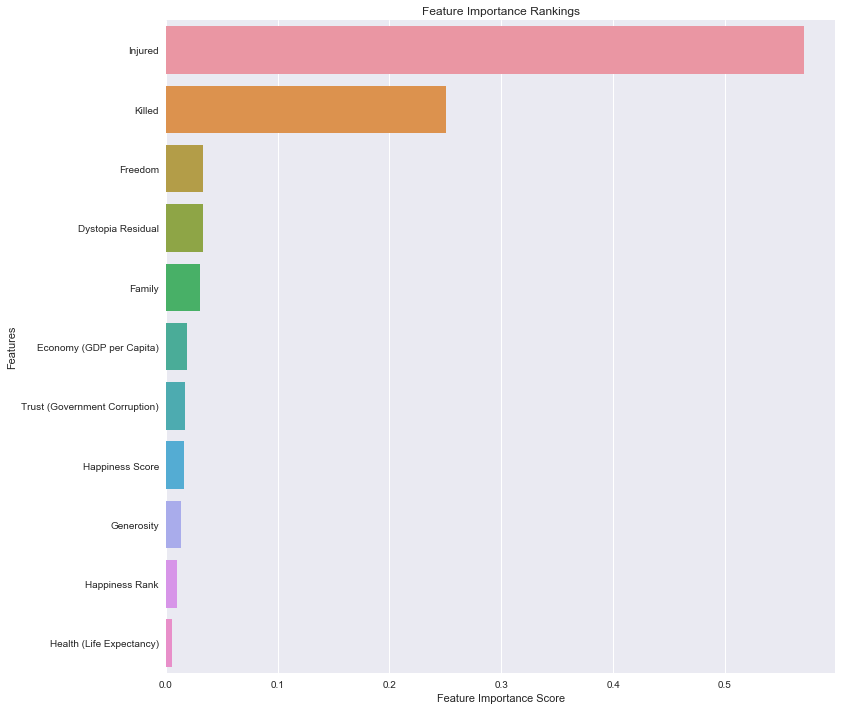

In [80]:
# Creating a bar plot for feature importances

# Firstly creating a Pandas Series to match feature importances values and their indices, also sorting them in decreasing order
feature_importances = pd.Series(modelrf.feature_importances_, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importances, y=feature_importances.index)

# Add labels to our graph  
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()

According to above distribution, the number of killed and injured people have affected mostly the type of terrorist attacks. This was expected but among others, the most affected attribute was the freedom, dystopia and family metrics.